In [1]:
from IPython.display import Image
import pandas as pd

# Step 1/Cleaning_Data

1.Kiểm tra giá trị thiếu: Kiểm tra và điền giá trị thiếu vào các cột như 'Age Range', 'Circulation Active Month', và 'Circulation Active Year' bằng các giá trị mặc định hoặc giá trị phổ biến nhất trong cột đó.

2.Chuyển đổi kiểu dữ liệu:

    - Bạn kiểm tra và chuyển đổi kiểu dữ liệu của cột 'Circulation Active Year' nếu cần.
    - Kiểm tra và thay thế giá trị âm trong các cột 'Total Checkouts' và 'Total Renewals' bằng giá trị 0.

3.Thay thế giá trị không hợp lệ:

    - Các giá trị không hợp lệ trong cột 'Age Range', 'Circulation Active Month' được thay thế bằng giá trị mặc định như "Unknown".
    - Thay thế các giá trị không hợp lệ trong các cột số học bằng giá trị trung bình hoặc 0 nếu chúng là ngoại lệ.
    - Kiểm tra và xử lý các giá trị ngoại lệ:

4.Tính toán các giá trị ngoại lệ trong các cột 'Total Checkouts' và 'Total Renewals' dựa trên IQR (Interquartile Range) và thay thế các giá trị ngoài phạm vi hợp lý bằng giá trị trung bình.

5.kiểm tra và loại bỏ các dòng dữ liệu trùng lặp trong bộ dữ liệu.

6.Phân tích phân phối dữ liệu:  vẽ histogram và Q-Q plot để kiểm tra phân phối dữ liệu cho các cột số.

7.Chuẩn hóa và ánh xạ mã thư viện:

    - Chuẩn hóa mã thư viện trong cột 'Home Library Code' bằng cách thay thế mã không hợp lệ và ánh xạ chúng thành tên thư viện đầy đủ.
    - Lọc dữ liệu để chỉ giữ lại các mã thư viện hợp lệ.
    - Chuẩn hóa khoảng tuổi
    - Bạn chuẩn hóa cột 'Age Range' thành các giá trị số trung bình của mỗi nhóm tuổi và tính Z-score cho cột 'Normalized Age', giúp phân tích dữ liệu trong phạm vi chuẩn.

In [2]:
df= pd.read_csv('C:\\Users\\phamt\\Downloads\\cleaning_data.csv')
df

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Provided Email Address,Year Patron Registered,Home Library Full Name,Normalized Age,Z-Score Age
0,0,Adult,241.465582,108.8307,55 to 59 years,r3,Richmond,Jun,2023,True,2003,Richmond,57.0,0.999019
1,0,Adult,1.000000,0.0000,25 to 34 years,r3,Richmond,Jun,2023,True,2017,Richmond,30.0,-0.358629
2,0,Adult,241.465582,108.8307,60 to 64 years,s7,Sunset,Jul,2022,True,2003,Sunset,62.0,1.250435
3,0,Adult,241.465582,108.8307,45 to 54 years,m6,Mission,Jun,2023,True,2003,Mission,50.0,0.647036
4,3,Senior,46.000000,27.0000,65 to 74 years,m6,Mission,May,2023,True,2019,Mission,70.0,1.652701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51293,0,Adult,16.000000,16.0000,55 to 59 years,s7,Sunset,Jul,2023,True,2022,Sunset,57.0,0.999019
51294,2,Teen,424.000000,37.0000,10 to 19 years,s7,Sunset,Jul,2023,True,2011,Sunset,15.0,-1.112877
51295,0,Adult,393.000000,13.0000,10 to 19 years,s7,Sunset,Apr,2022,True,2004,Sunset,15.0,-1.112877
51296,0,Adult,241.465582,108.8307,10 to 19 years,s7,Sunset,Apr,2021,True,2008,Sunset,15.0,-1.112877


# Step 2: Exploring the Data

In [3]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy.stats import skew, kurtosis, shapiro
# Đọc lại file CSV
data = pd.read_csv("C:\\Users\\phamt\\Downloads\\cleaning_data.csv")
data ['Count'] = 1
dfpatron = data.groupby('Patron Type Definition', as_index=False)['Count'].sum()
dfpatron

,Patron Type Definition,Count
0,Adult,32634
1,Juvenile,5934
2,Senior,6479
3,Teen,6251


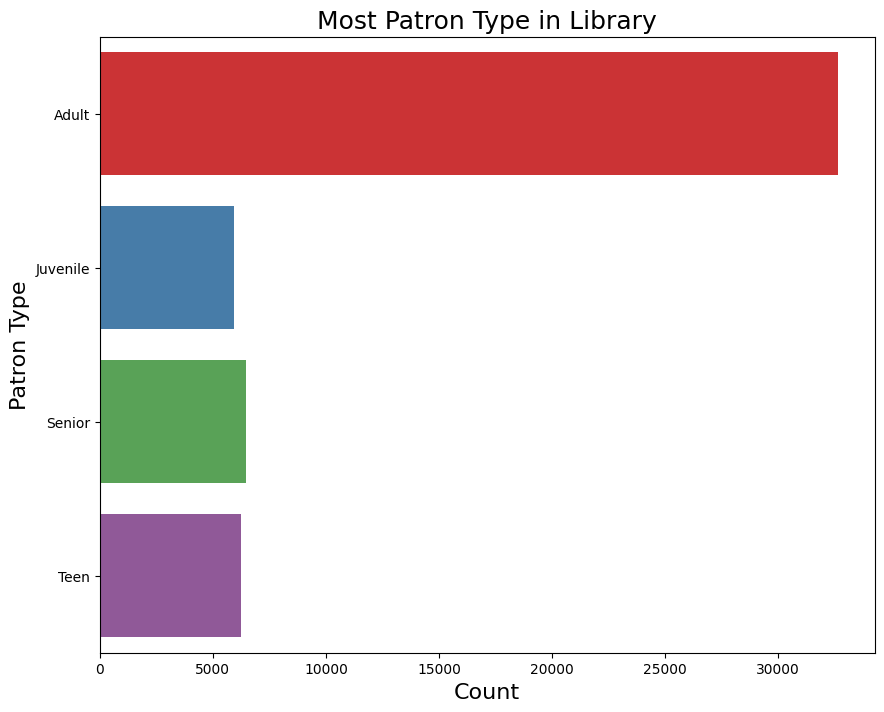

<Figure size 640x480 with 0 Axes>

In [4]:
#Show Bar Chart
plt.figure(figsize=(10,8))
sns.barplot(data=dfpatron, x='Count', y='Patron Type Definition',palette='Set1')
plt.title('Most Patron Type in Library', fontsize=18)
plt.xlabel ('Count', fontsize=16)
plt.ylabel ('Patron Type', fontsize=16)
plt.show()
plt.savefig('patron_type_chart.png', format='png')


- Biểu đồ cho thấy nhóm đối tượng "Adult" (Người lớn) có số lượng cao nhất, vượt xa các nhóm khác với con số trên 30,000 lượt. Điều này gợi ý rằng người lớn là đối tượng khách hàng chủ yếu của thư viện
- Nhóm "Adult": Số lượng người lớn sử dụng thư viện rất cao, có thể do nhiều lý do như nhu cầu đọc sách nghiên cứu, giải trí hay sự thuận tiện khi sử dụng thư viện.
- Juvenile(Trẻ em) ít sử dụng thư viện hơn so với các nhóm tuổi khác.

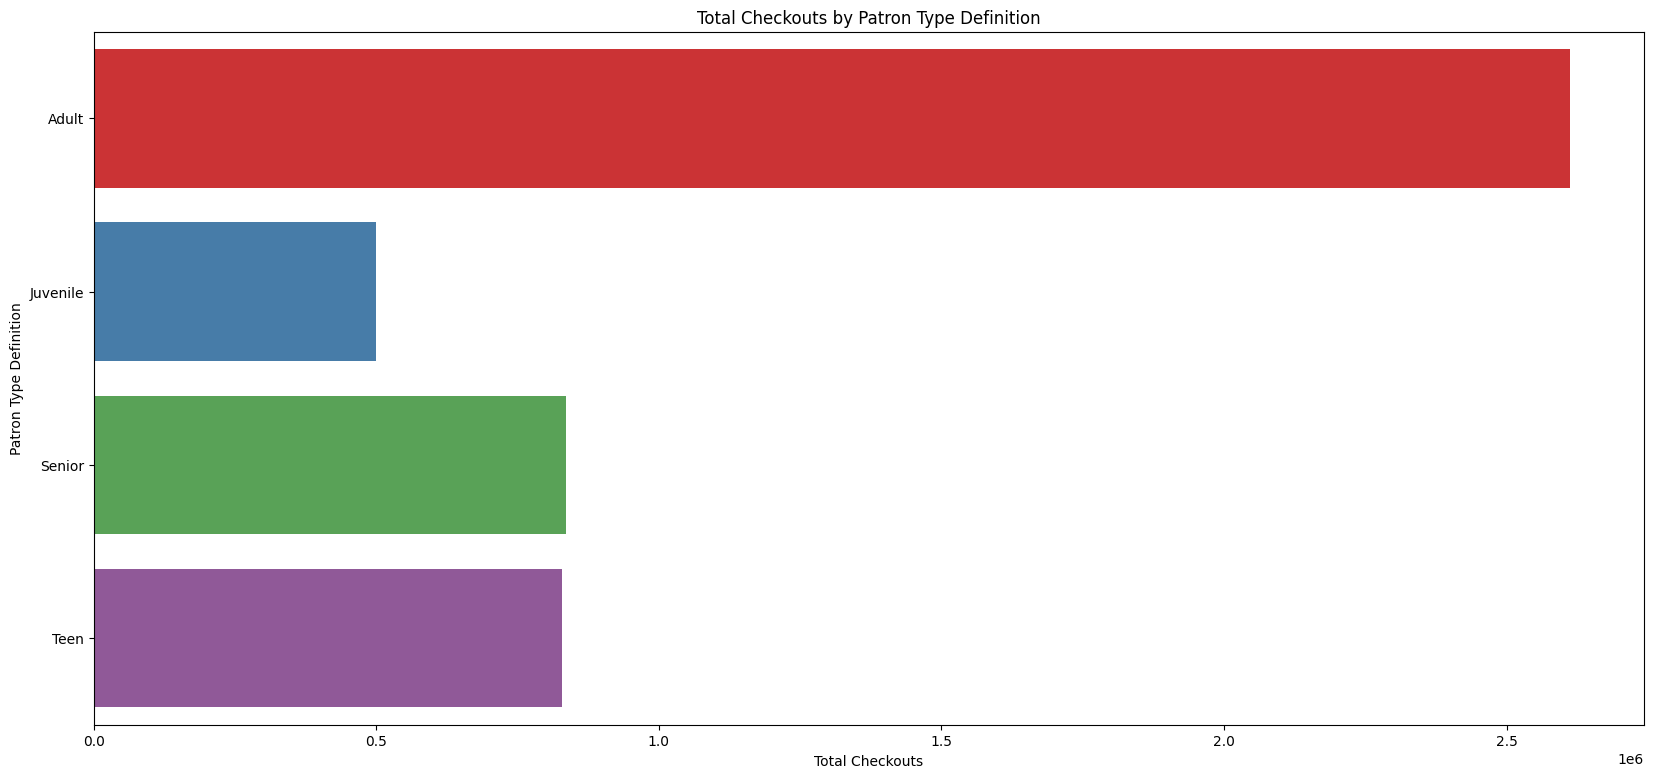

In [5]:
# Nhóm theo Patron Type Definition và tính tổng số Total Checkouts
df_checkouts = data.groupby('Patron Type Definition')['Total Checkouts'].sum().reset_index()

# Vẽ biểu đồ thanh
plt.figure(figsize=(20, 9))
sns.barplot(x='Total Checkouts', y='Patron Type Definition', data=df_checkouts, palette='Set1')

# Thêm tiêu đề cho biểu đồ
plt.title("Total Checkouts by Patron Type Definition")
plt.xlabel("Total Checkouts")
plt.ylabel("Patron Type Definition")
plt.show()

- Nhóm "Adult" có số lượt mượn sách cao nhất , Điều này chỉ ra rằng người lớn là nhóm khách hàng chủ yếu của thư viện, có thể do nhu cầu cao về tài liệu nghiên cứu, giải trí và học tập.
- Thanh thiếu niên có số lượt mượn sách tương đối cao, cho thấy thư viện là một nguồn tài nguyên quan trọng cho việc học tập và giải trí. Nhưng họ lại gia hạn mượn sách thì thấp nhất
- Thiếu nhi (Juvenile) là nhóm có số lượt mượn sách ít nhất
 =>Thư viện nên tập trung vào việc cung cấp các tài liệu phù hợp với nhu cầu của người trưởng thành. 

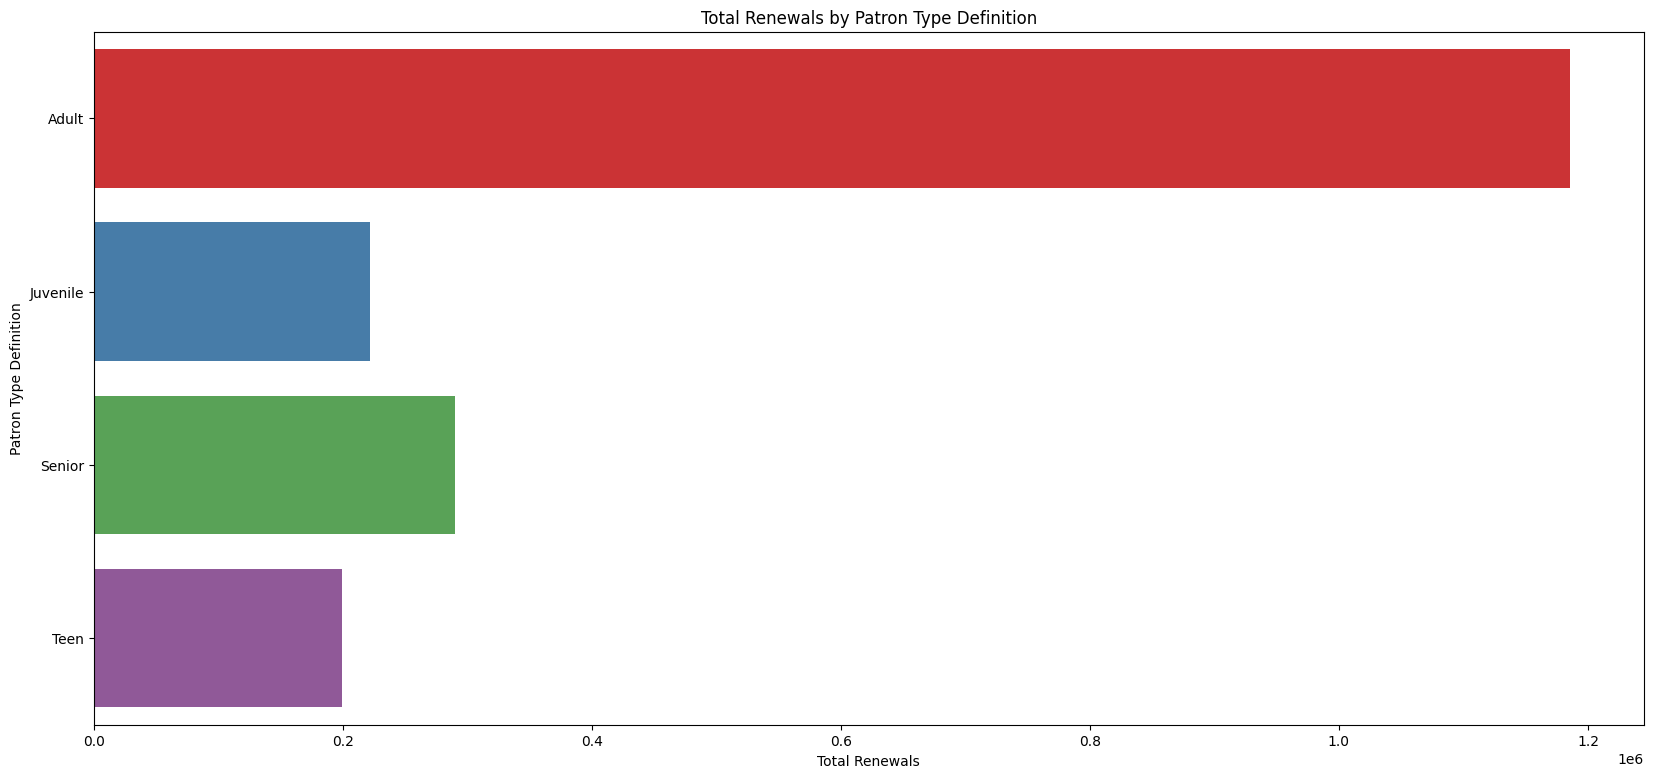

In [6]:
# Nhóm theo Patron Type Definition và tính tổng số Total Renewals
df_renewals = data.groupby('Patron Type Definition')['Total Renewals'].sum().reset_index()

# Vẽ biểu đồ thanh
plt.figure(figsize=(20, 9))
sns.barplot(x='Total Renewals', y='Patron Type Definition', data=df_renewals, palette='Set1')

# Thêm tiêu đề cho biểu đồ
plt.title("Total Renewals by Patron Type Definition")
plt.xlabel("Total Renewals")
plt.ylabel("Patron Type Definition")
plt.show()


- Nhóm Adult có số lần gia hạn cao nhất, trong khi nhóm Juvenile có số lần gia hạn thấp nhất. Điều này có thể chỉ ra rằng người trưởng thành sử dụng dịch vụ thư viện nhiều hơn hoặc cần gia hạn sách nhiều hơn so với các nhóm tuổi khác
- Người trưởng thành sử dụng thư viện nhiều hơn: Nhóm người trưởng thành có thể thường xuyên sử dụng thư viện, dẫn đến nhu cầu gia hạn sách hoặc tài liệu cao hơn so với các nhóm tuổi khác.
- Sự cần thiết gia hạn: Người trưởng thành có thể mượn nhiều tài liệu hơn hoặc các tài liệu mượn có thời gian sử dụng dài hơn, dẫn đến việc gia hạn nhiều lần hơn.

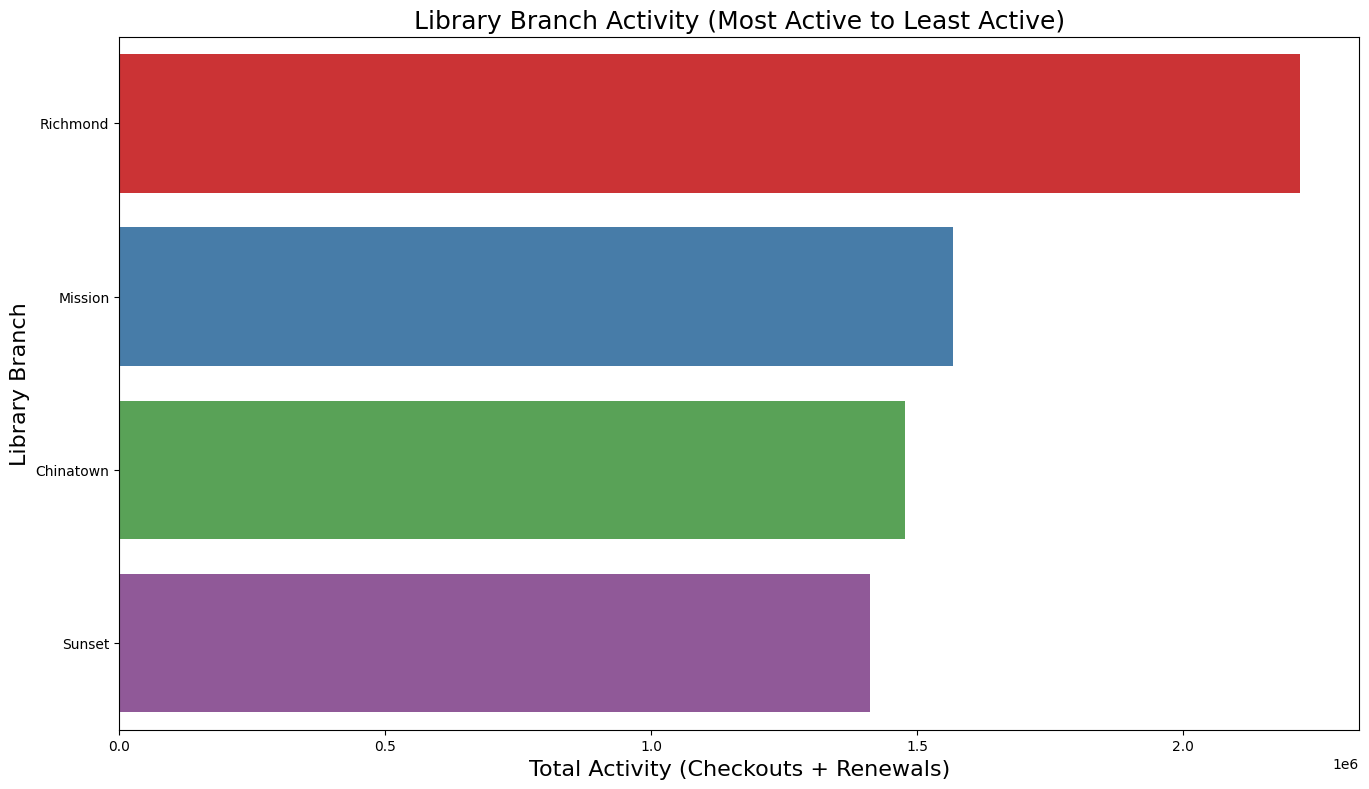

In [7]:
# Nhóm theo 'Home Library Definition' và tính tổng hoạt động
library_activity = data.groupby('Home Library Definition')[['Total Checkouts', 'Total Renewals']].sum().reset_index()

# Tạo thêm cột 'Total Activity' để tổng hợp hoạt động
library_activity['Total Activity'] = library_activity['Total Checkouts'] + library_activity['Total Renewals']

# Sắp xếp thư viện theo tổng hoạt động giảm dần
library_activity = library_activity.sort_values('Total Activity', ascending=False)

# Vẽ biểu đồ thanh
plt.figure(figsize=(16, 9))
sns.barplot(
    x='Total Activity',
    y='Home Library Definition',
    data=library_activity,
    palette='Set1'
)
plt.title("Library Branch Activity (Most Active to Least Active)", fontsize=18)
plt.xlabel("Total Activity (Checkouts + Renewals)", fontsize=16)
plt.ylabel("Library Branch", fontsize=16)
plt.show()


In [8]:
# In dữ liệu ra dưới dạng bảng
print("Library Branch Activity:")
print(library_activity)


print("\nTop  Most Active Library Branches:")
print(library_activity.head(4))

Library Branch Activity:
  Home Library Definition  Total Checkouts  Total Renewals  Total Activity
2                Richmond     1.574594e+06   644833.626131    2.219428e+06
1                 Mission     1.107665e+06   458505.025378    1.566170e+06
0               Chinatown     1.107467e+06   369224.183364    1.476691e+06
3                  Sunset     9.864208e+05   424148.941900    1.410570e+06

Top  Most Active Library Branches:
  Home Library Definition  Total Checkouts  Total Renewals  Total Activity
2                Richmond     1.574594e+06   644833.626131    2.219428e+06
1                 Mission     1.107665e+06   458505.025378    1.566170e+06
0               Chinatown     1.107467e+06   369224.183364    1.476691e+06
3                  Sunset     9.864208e+05   424148.941900    1.410570e+06


- Richmond: Đây là thư viện hoạt động nhiều nhất, với tổng hoạt động vượt trội hơn so với các chi nhánh khác. Điều này cho thấy Richmond có lượng người sử dụng lớn, cả về mượn sách lẫn gia hạn.
- Mission và Chinatown: Cả hai chi nhánh này có mức độ hoạt động tương đương nhau, nhưng Mission có lượng gia hạn cao hơn, trong khi Chinatown chủ yếu tập trung vào mượn sách.
- Sunset: Tuy có tổng hoạt động thấp hơn các thư viện trên, nhưng vẫn duy trì lượng người dùng ổn định.

# Step 3 : Machine Learning

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_squared_error, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
# Đọc dữ liệu
df = pd.read_csv("C:\\Users\\phamt\\Downloads\\cleaning_data.csv")
X = df.drop('Patron Type Definition', axis=1)  # Giả sử 'Patron Type Definition' là cột mục tiêu
y = df['Patron Type Definition']               #giá trị mà mô hình sẽ cố gắng dự đoán dựa trên các đặc trưng trong X
# Mã hóa cột mục tiêu nếu là phân loại ['Adult', 'Senior', 'Teen','Juvenile'] -> [0,1,2,3]
label_encoder = LabelEncoder()                   
y_encoded = label_encoder.fit_transform(y)
# Xác định loại đặc trưng
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
# Đối với dữ liệu số: Chuẩn hóa các giá trị bằng StandardScaler().
# Đối với dữ liệu phân loại: Áp dụng One-Hot Encoding để chuyển các giá trị phân loại thành các cột nhị phân.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())  # Chuẩn hóa (scaling) dữ liệu số.
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One hot encoding cho dữ liệu phân loại
        ]), categorical_features)
    ]
)
# Chia dữ liệu thành tập huấn luyện (80%) và tập kiểm tra(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Tiến hành xử lý dữ liệu
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [10]:
# Chọn mô hình hồi quy tuyến tính
reg_model = LinearRegression()

# Thực hiện cross-validation cho mô hình hồi quy tuyến tính
reg_cv_scores = cross_val_score(reg_model, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation với MSE
print(f"Cross-validation MSE scores for Linear Regression: {-reg_cv_scores}")
print(f"Mean cross-validation MSE for Linear Regression: {-reg_cv_scores.mean():.4f}")

# Huấn luyện mô hình hồi quy tuyến tính với tập huấn luyện đầy đủ
reg_model.fit(X_train_transformed, y_train)

# Dự đoán trên tập kiểm thử
y_pred_reg = reg_model.predict(X_test_transformed)

# Đánh giá mô hình hồi quy tuyến tính
mse_reg = mean_squared_error(y_test, y_pred_reg)
mae_reg = mean_absolute_error(y_test, y_pred_reg)

# In kết quả cho mô hình hồi quy tuyến tính
print(f"Linear Regression Mean Squared Error: {mse_reg:.4f}")
print(f"Linear Regression Mean Absolute Error: {mae_reg:.4f}")

Cross-validation MSE scores for Linear Regression: [0.01585176 0.01889197 0.01663999 0.01833277 0.01936858]
Mean cross-validation MSE for Linear Regression: 0.0178
Linear Regression Mean Squared Error: 0.0175
Linear Regression Mean Absolute Error: 0.0523


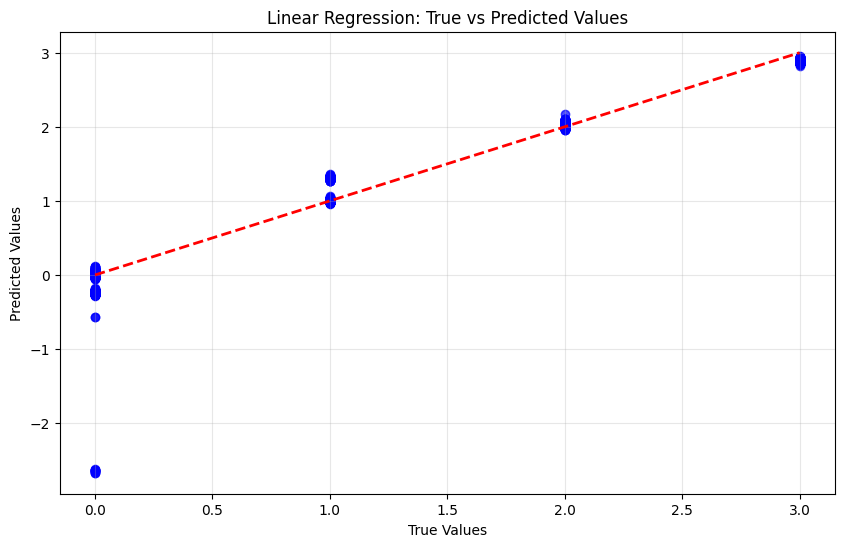

In [11]:
# Vẽ biểu đồ scatter cho Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_reg, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Đường y = x
plt.title("Linear Regression: True vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(alpha=0.3)
plt.show()

                                Mối quan hệ giữa giá trị thực tế và giá trị dự đoán

In [12]:
# Chọn mô hình kNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Sử dụng k=5, bạn có thể tùy chỉnh giá trị này

# Thực hiện cross-validation cho mô hình kNN
knn_cv_scores = cross_val_score(knn_model, X_train_transformed, y_train, cv=5, scoring='accuracy')  # Sử dụng 5-fold cross-validation
print(f"Cross-validation accuracy scores for kNN: {knn_cv_scores}")
print(f"Mean cross-validation accuracy for kNN: {knn_cv_scores.mean():.4f}")

# Huấn luyện mô hình kNN với tập huấn luyện đầy đủ
knn_model.fit(X_train_transformed, y_train)

# Dự đoán trên tập kiểm thử
y_pred_knn = knn_model.predict(X_test_transformed)

# Đánh giá mô hình phân loại kNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')  # 'weighted' để xử lý dữ liệu mất cân bằng
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')  # 'weighted' để xử lý dữ liệu mất cân bằng
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')  # 'weighted' để xử lý dữ liệu mất cân bằng

# In kết quả cho mô hình kNN
print(f"kNN Accuracy: {accuracy_knn:.4f}")
print(f"kNN Precision: {precision_knn:.4f}")
print(f"kNN Recall: {recall_knn:.4f}")
print(f"kNN F1-Score: {f1_knn:.4f}")

Cross-validation accuracy scores for kNN: [0.99000975 0.9920809  0.99025341 0.99098331 0.98927745]
Mean cross-validation accuracy for kNN: 0.9905
kNN Accuracy: 0.9923
kNN Precision: 0.9924
kNN Recall: 0.9923
kNN F1-Score: 0.9923


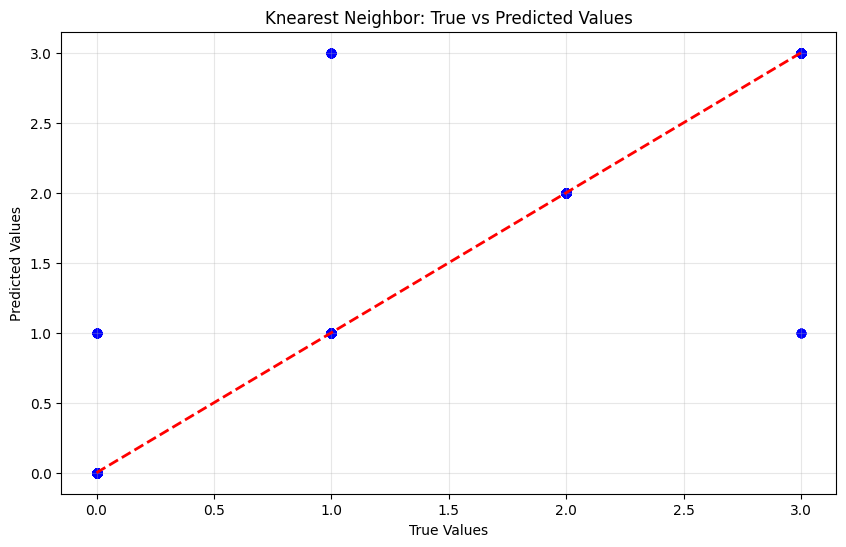

In [13]:
# Vẽ biểu đồ scatter cho Knearest Neighbor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Đường y = x
plt.title("Knearest Neighbor: True vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(alpha=0.3)
plt.show()

In [14]:
# Chọn mô hình phân loại: SVM
svm_model = SVC()

# Thực hiện cross-validation cho mô hình SVM
svm_cv_scores = cross_val_score(svm_model, X_train_transformed, y_train, cv=5, scoring='accuracy')  # Sử dụng 5-fold cross-validation
print(f"Cross-validation accuracy scores for SVM: {svm_cv_scores}")
print(f"Mean cross-validation accuracy for SVM: {svm_cv_scores.mean():.4f}")

# Huấn luyện mô hình SVM với tập huấn luyện đầy đủ
svm_model.fit(X_train_transformed, y_train)

# Dự đoán trên tập kiểm thử
y_pred_svm = svm_model.predict(X_test_transformed)

# Đánh giá mô hình phân loại SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')  # 'weighted' để xử lý dữ liệu mất cân bằng
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')  # 'weighted' để xử lý dữ liệu mất cân bằng
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')  # 'weighted' để xử lý dữ liệu mất cân bằng

# In kết quả cho mô hình SVM
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM Precision: {precision_svm:.4f}")
print(f"SVM Recall: {recall_svm:.4f}")
print(f"SVM F1-Score: {f1_svm:.4f}")

Cross-validation accuracy scores for SVM: [1.         0.99987817 1.         1.         1.        ]
Mean cross-validation accuracy for SVM: 1.0000
SVM Accuracy: 1.0000
SVM Precision: 1.0000
SVM Recall: 1.0000
SVM F1-Score: 1.0000


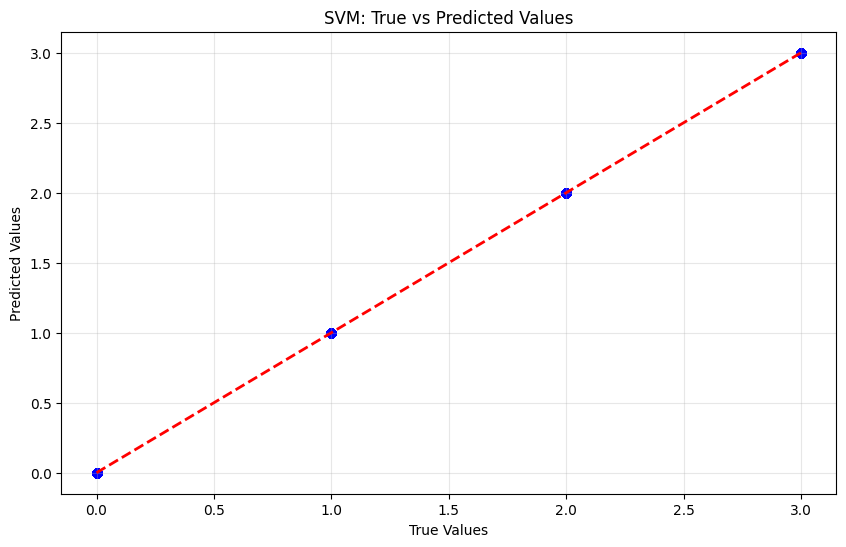

In [15]:
# Vẽ biểu đồ scatter cho Support Vector Machine
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svm, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Đường y = x
plt.title("SVM: True vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(alpha=0.3)
plt.show()